In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utilsplot import ItoJ, offset_XY, outFigCSV

csv_dir = "../Data/FigureS26_X-ray"

save_option = True
figsavepath = "../Figures/FigureS26_X-ray-detectors.svg"

# Store the selected file paths in a list
csv_list = glob.glob(f'{csv_dir}/*.csv')
csv_list.sort()

# Make dataframes with its label df_1, df_2, ...
files = []
df_list = []
for i, file_path in enumerate(csv_list):
    file_name = os.path.basename(file_path)
    files.append(file_name)
    mkdata = f'df_{i+1}= pd.read_csv("{file_path}")'
    mklist = f'df_list.append(df_{i+1})'
    exec(mkdata)
    exec(mklist)
    print('{:02d}: {}'.format(i+1, file_name))

01: 230528-0.2mmh_-002.4V.csv
02: 230528-0.2mmh_-004.8V.csv
03: 230528-0.2mmh_-012.0V.csv
04: 230528-0.2mmh_-024.0V.csv
05: 230528-0.2mmh_-048.0V.csv
06: 230528-0.2mmh_-120.0V.csv
07: 230530-0.5mmh_-003.1V.csv
08: 230530-0.5mmh_-006.2V.csv
09: 230530-0.5mmh_-015.5V.csv
10: 230530-0.5mmh_-031.0V.csv
11: 230530-0.5mmh_-062.0V.csv
12: 230530-0.5mmh_-155.0V.csv


230528-0.2mmh_-002.4V.csv


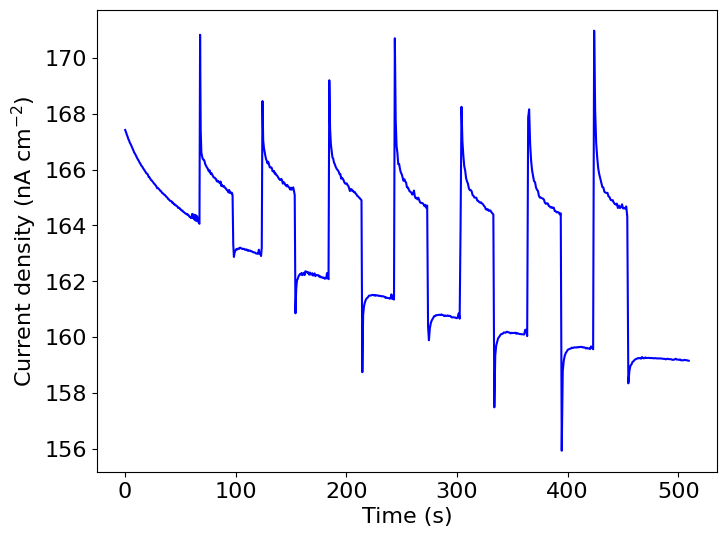

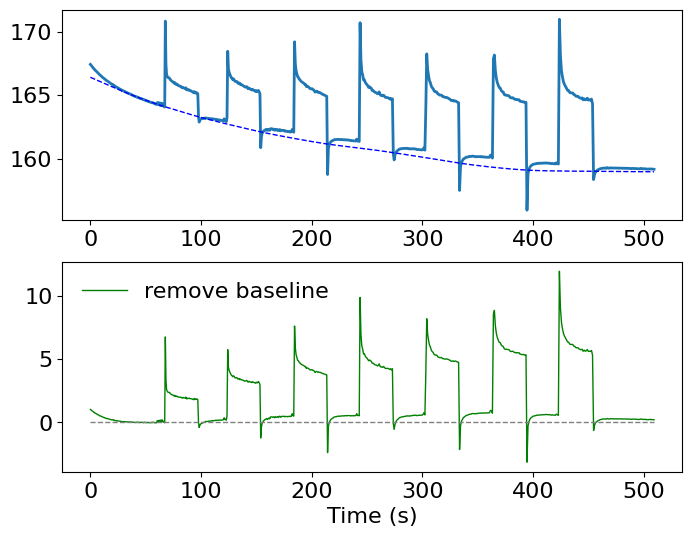

230528-0.2mmh_-004.8V.csv


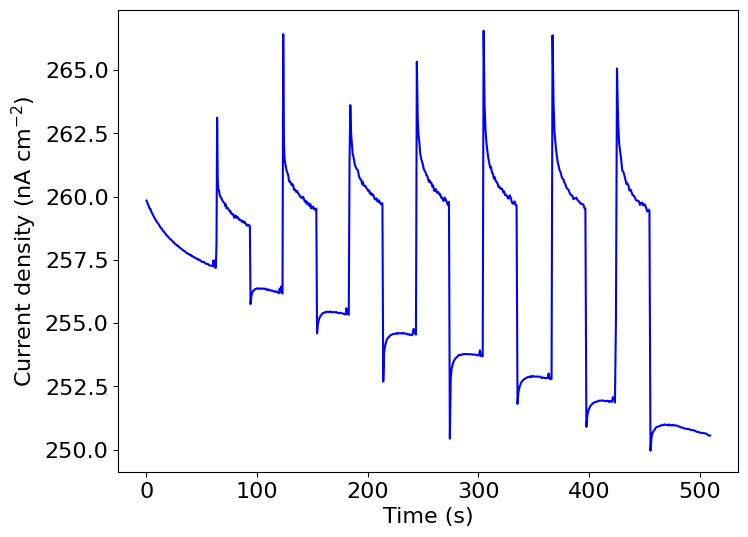

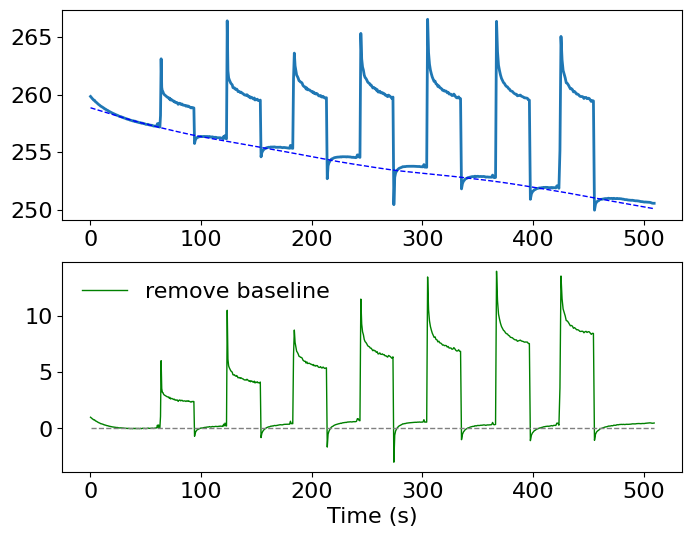

230528-0.2mmh_-012.0V.csv


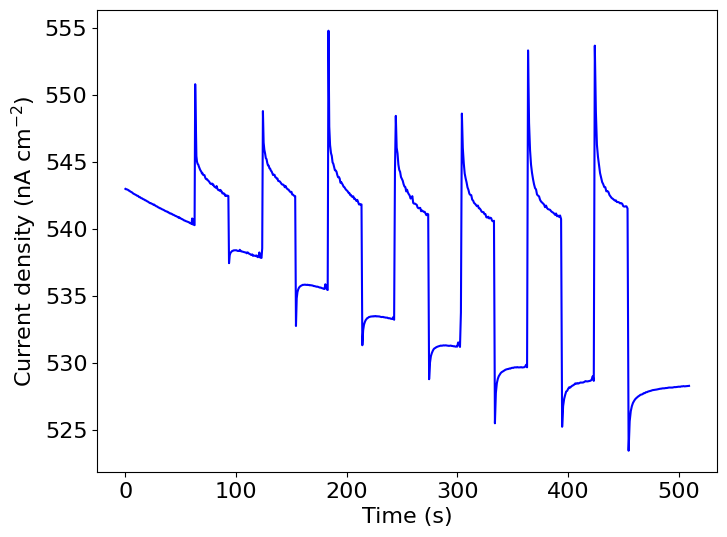

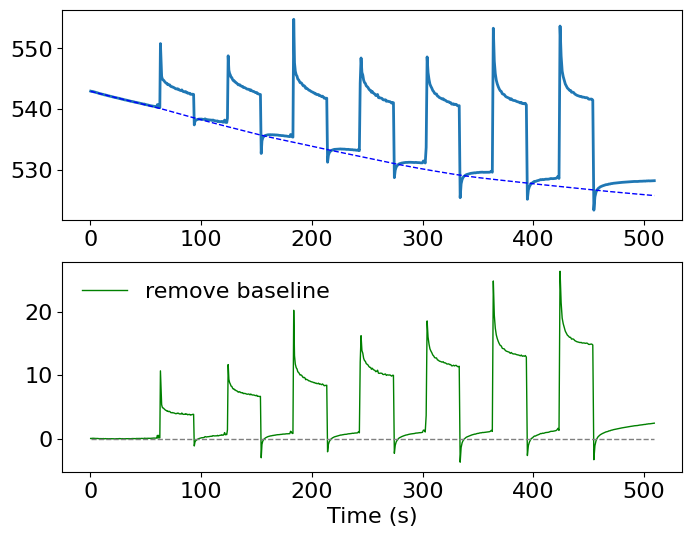

230528-0.2mmh_-024.0V.csv


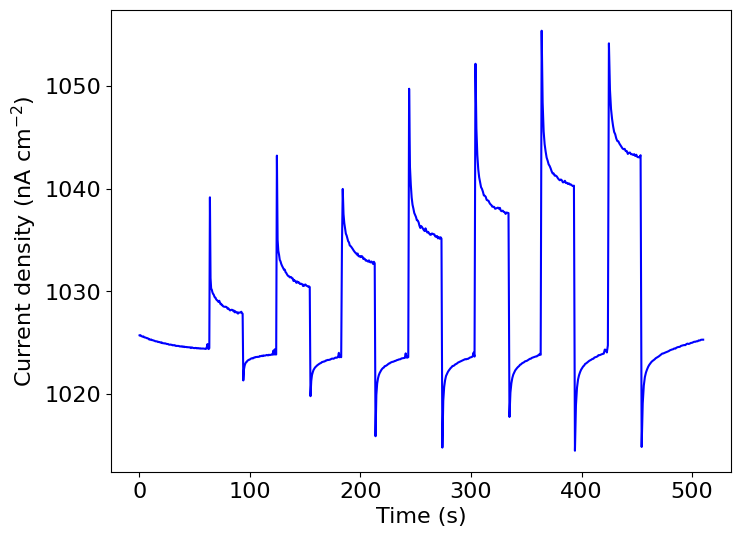

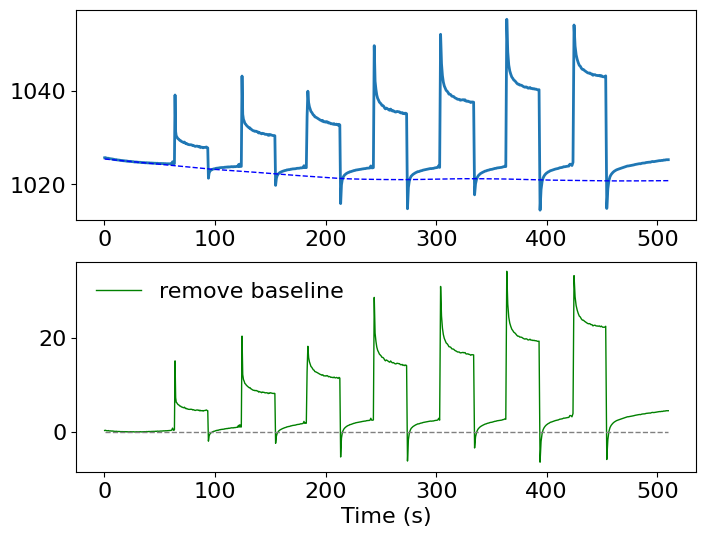

230528-0.2mmh_-048.0V.csv


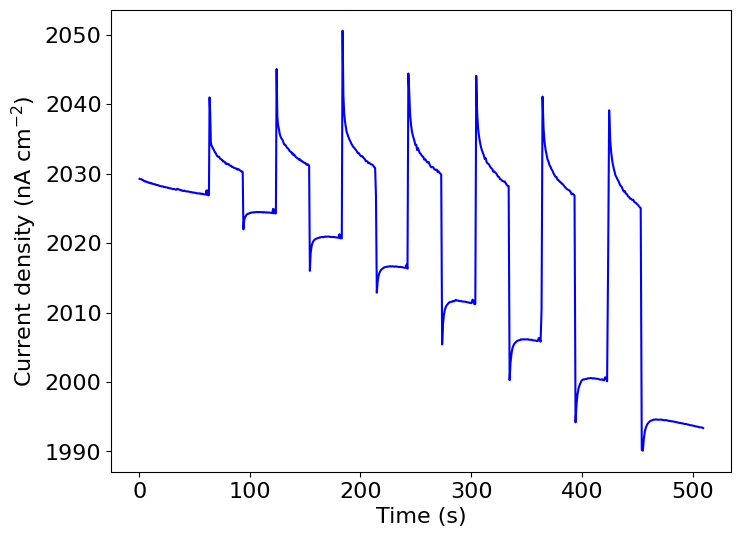

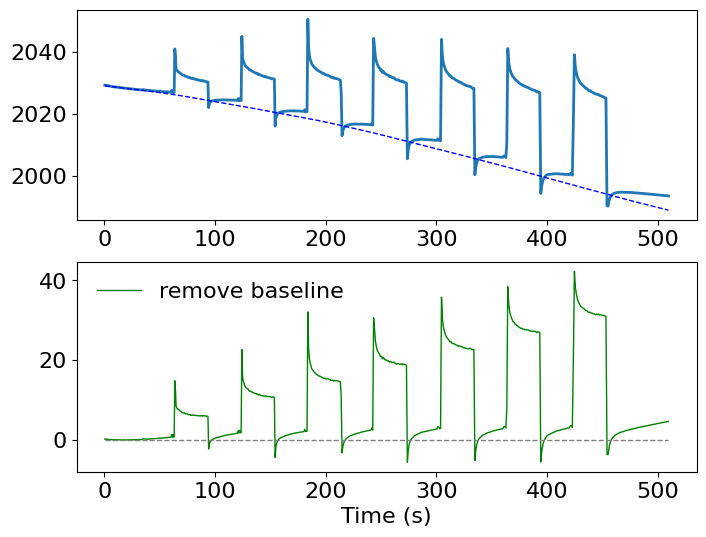

230528-0.2mmh_-120.0V.csv


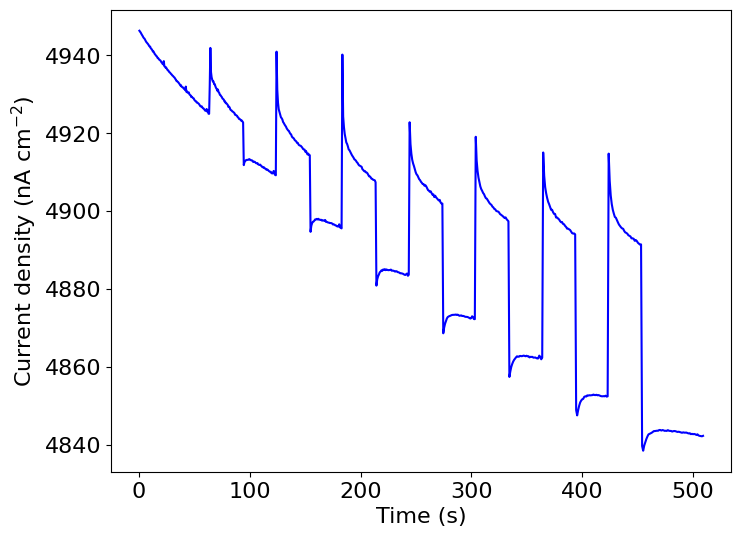

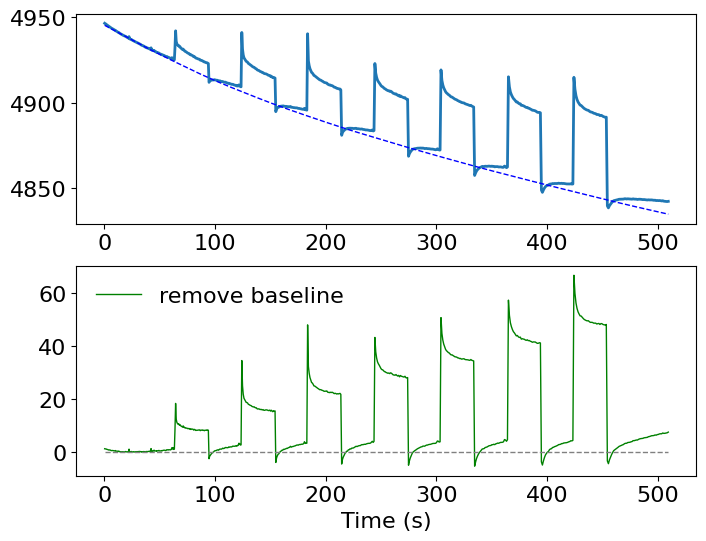

230530-0.5mmh_-003.1V.csv


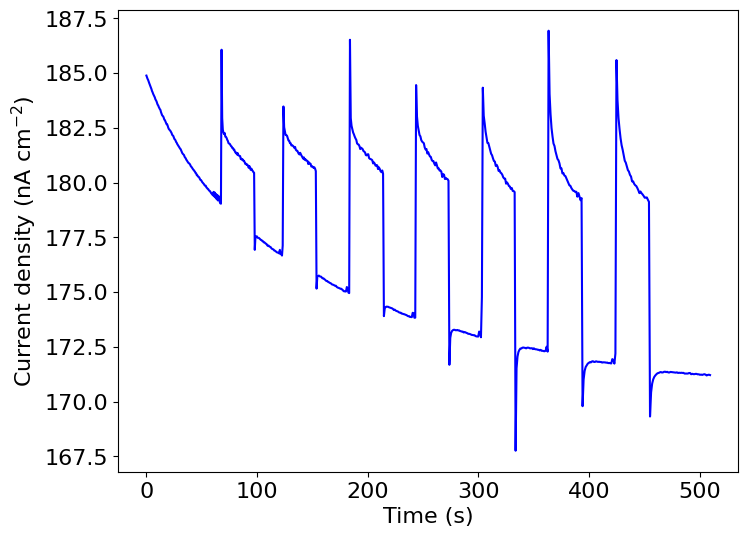

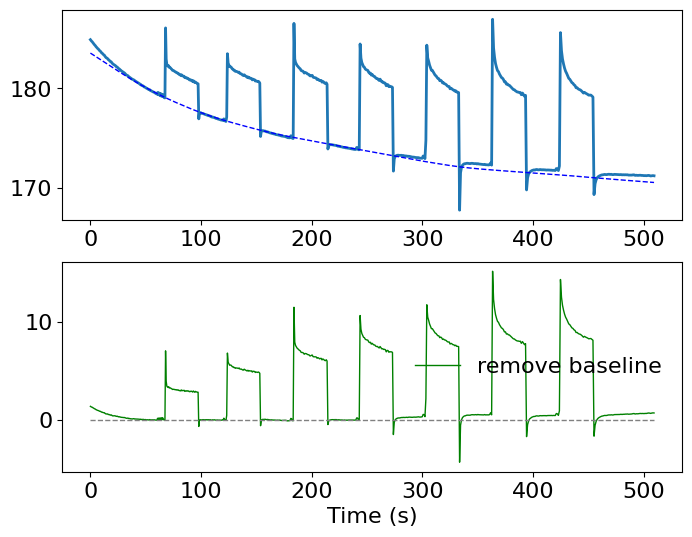

230530-0.5mmh_-006.2V.csv


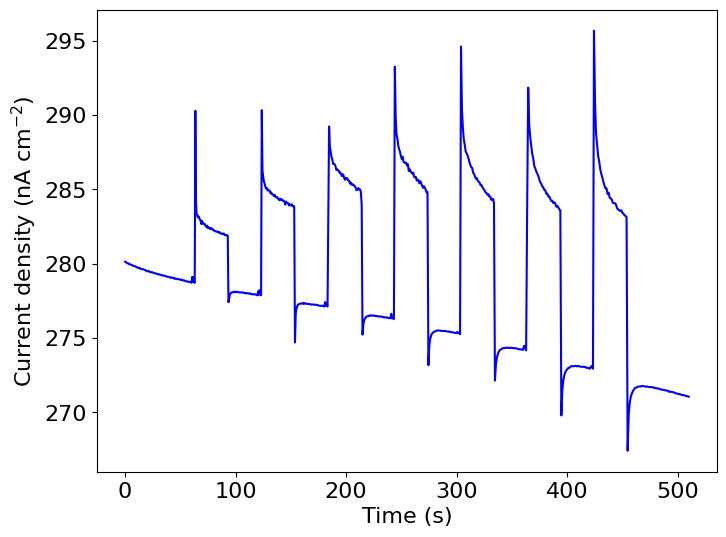

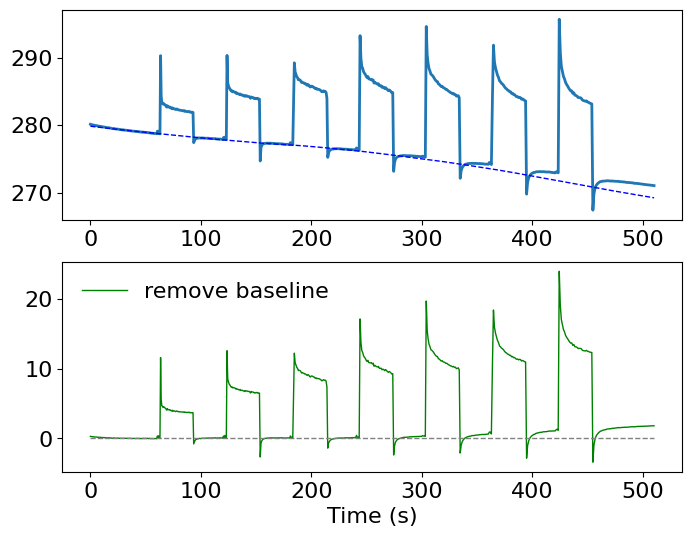

230530-0.5mmh_-015.5V.csv


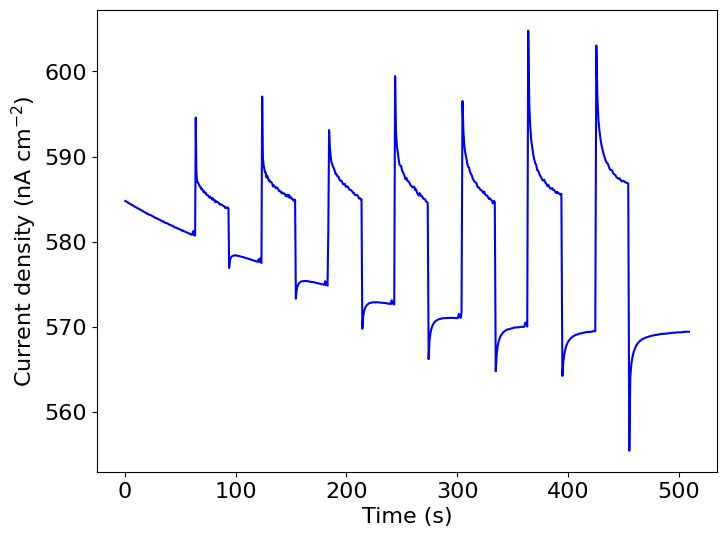

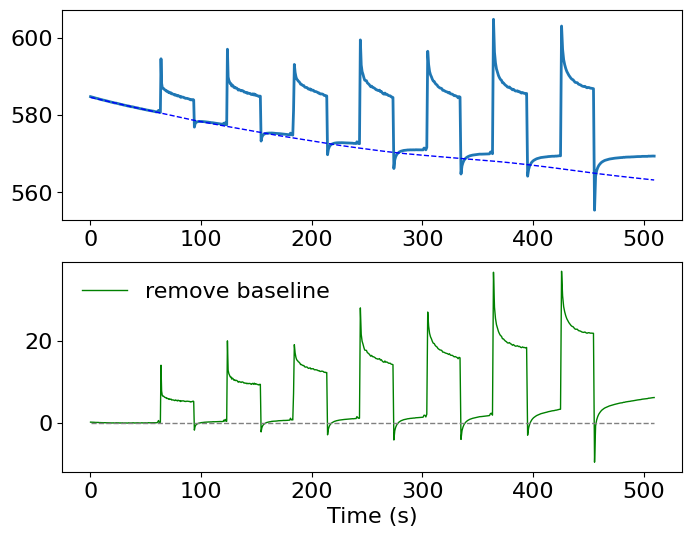

230530-0.5mmh_-031.0V.csv


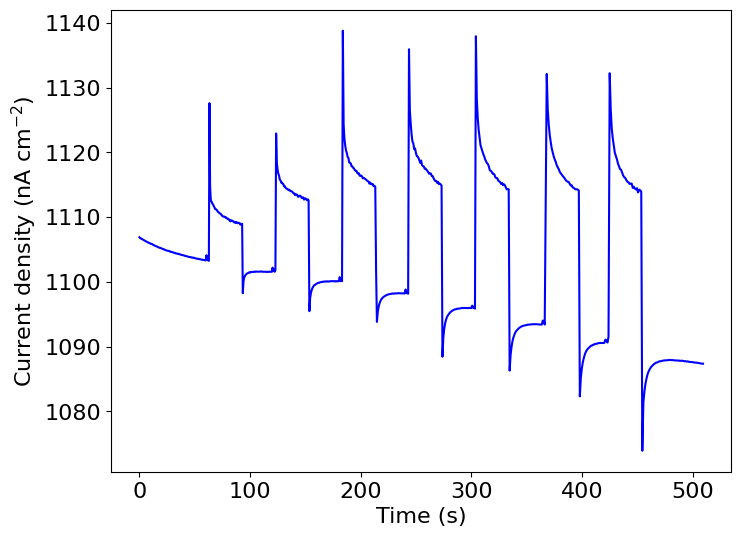

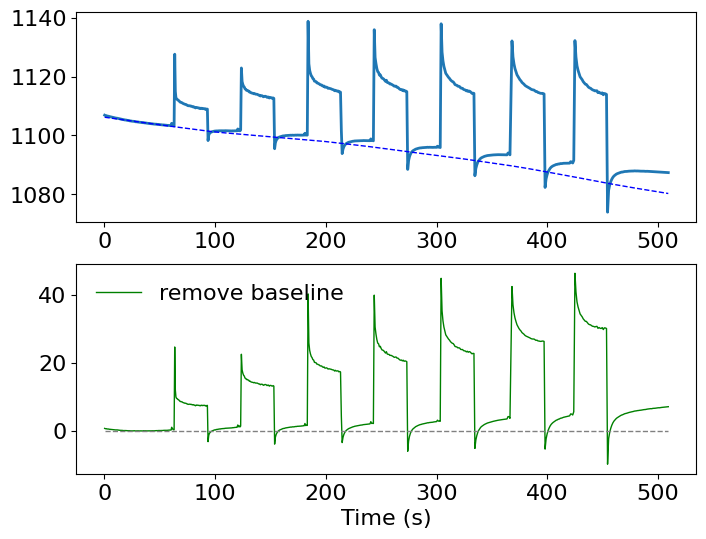

230530-0.5mmh_-062.0V.csv


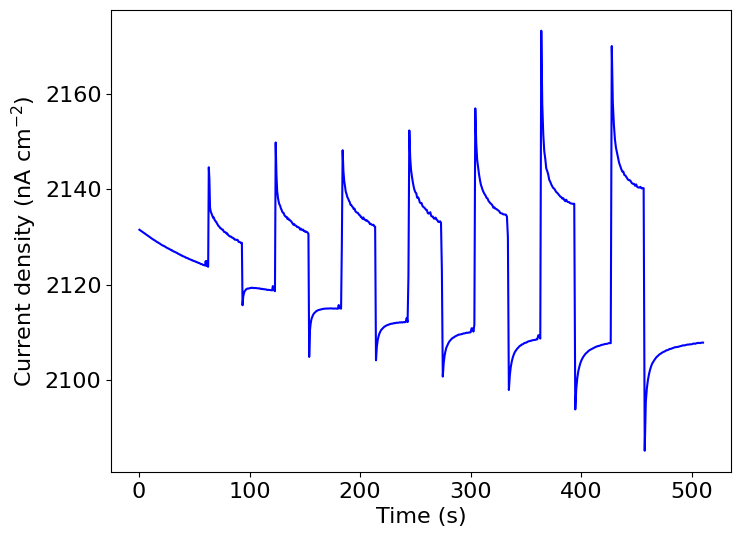

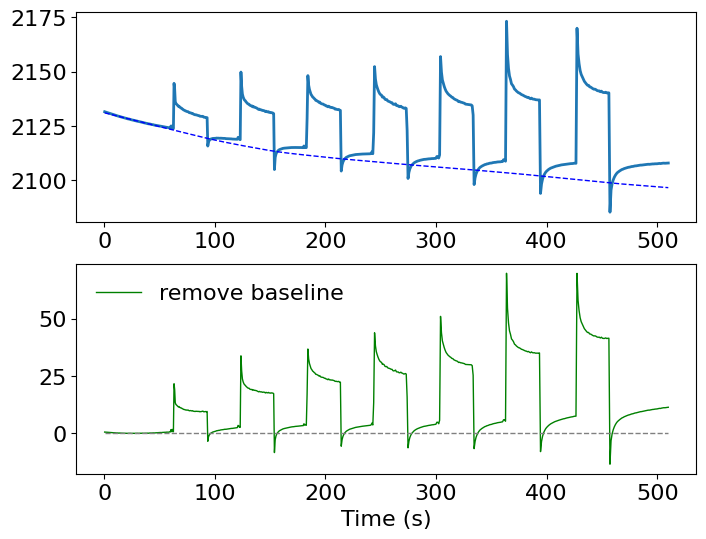

230530-0.5mmh_-155.0V.csv


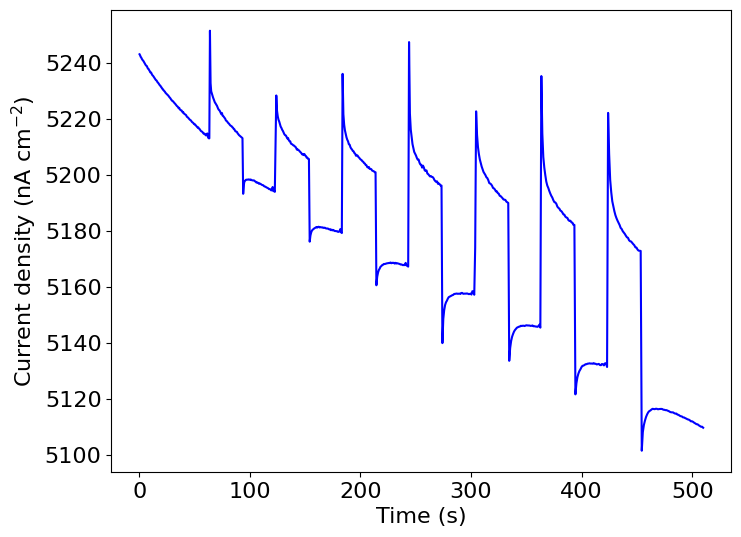

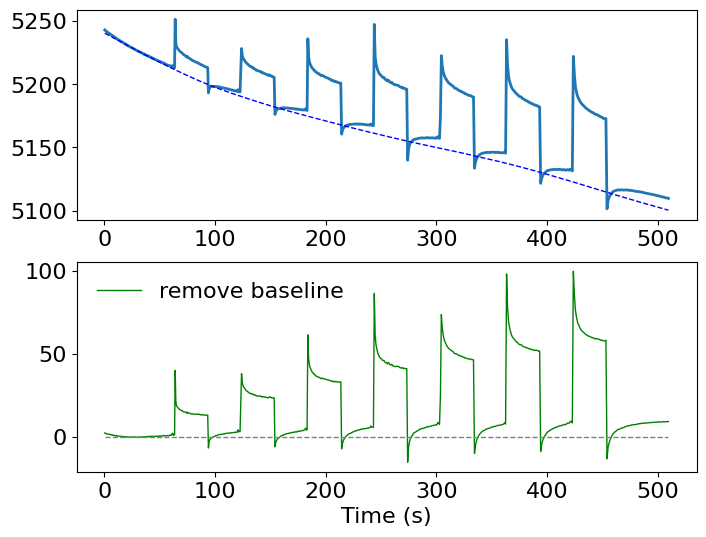

In [2]:
# some parameters
file_IDs = np.arange(1,len(csv_list)+1,1)
area = 0.044 #cm2
J_unit = 'nA/cm2' # 'pA/cm', 'nA/cm2', 'µA/cm2', 'mA/cm2'
time_offset = 30 # s

## Make directory to save the data
data_dir = f'{csv_dir}/bkg'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

for file_ID in file_IDs:
    label_name = files[file_ID-1]
    print(files[file_ID-1])
    # Read the data
    df_plot = df_list[file_ID-1]
    # Prepare time list
    x = df_plot['Time (s)'].to_list()
    # Prepare J list
    y = df_plot['Current (A)'].to_list()
    J, J_label = ItoJ(y,area,J_unit)

    # Remove first {time_offset} seconds
    t, J = offset_XY(x,J,time_offset)

    # Make a figure
    fig = plt.figure(figsize=(8,6))
    plt.rcParams["font.size"] = 16

    # Plot
    plt.plot(t, J, linestyle='-', label=label_name, color='blue')

    # Design
    plt.xlabel('Time (s)')
    # plt.legend(loc='best', frameon = False)
    # plt.xlim(0,100)
    plt.ylabel(J_label)
    plt.show()

    # Optimized parameter
    paramAsLS = [316227.7660168379, 0.01]
    
    # prepare J, the unit should be always 'nA/cm2'
    J_ = offset_XY(x,ItoJ(y,area,'nA/cm2')[0],time_offset)[1]

    # Save_path
    save_path = f'{data_dir}/{files[file_ID-1][:-4]}-bkg'

    # Execute
    outFigCSV(t,J_,paramAsLS, save_path, True)

In [3]:
'''
Read the original data in df_1, df_2, ...
1. Change the directory
2. Run
'''
import pandas as pd
import os
import glob


# Choose the bkg directory
csv_dir = f'{csv_dir}/bkg'

fig_save_option = True

if fig_save_option:
    figure_dir = csv_dir[:-4] + '/analysis-figure'
    if not os.path.exists(figure_dir):
        os.mkdir(figure_dir)
    
# Store the selected file paths in a list
csv_list = glob.glob(f'{csv_dir}/*.csv')
csv_list.sort()

# Make dataframes with its label df_1, df_2, ...
files = []
df_list = []
for i, file_path in enumerate(csv_list):
    file_name = os.path.basename(file_path)
    files.append(file_name)
    mkdata = f'df_{i+1}= pd.read_csv("{file_path}")'
    mklist = f'df_list.append(df_{i+1})'
    exec(mkdata)
    exec(mklist)
    print('{:02d}: {}'.format(i+1, file_name))

01: 230528-0.2mmh_-002.4V-bkg.csv
02: 230528-0.2mmh_-004.8V-bkg.csv
03: 230528-0.2mmh_-012.0V-bkg.csv
04: 230528-0.2mmh_-024.0V-bkg.csv
05: 230528-0.2mmh_-048.0V-bkg.csv
06: 230528-0.2mmh_-120.0V-bkg.csv
07: 230530-0.5mmh_-003.1V-bkg.csv
08: 230530-0.5mmh_-006.2V-bkg.csv
09: 230530-0.5mmh_-015.5V-bkg.csv
10: 230530-0.5mmh_-031.0V-bkg.csv
11: 230530-0.5mmh_-062.0V-bkg.csv
12: 230530-0.5mmh_-155.0V-bkg.csv


230528-0.2mmh_-002.4V-bkg.csv
Avg:2.1012,Std:0.1473
Avg:3.3512,Std:0.1140
Avg:4.2601,Std:0.2018
Avg:4.6447,Std:0.2217
Avg:5.1189,Std:0.1375
Avg:5.7703,Std:0.2250
Avg:6.0462,Std:0.2360


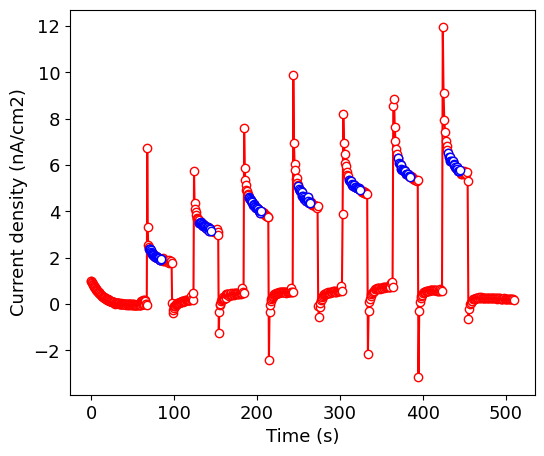

Sensitivity: 130.32 µC Gy-1 cm-2
R2: 0.9518


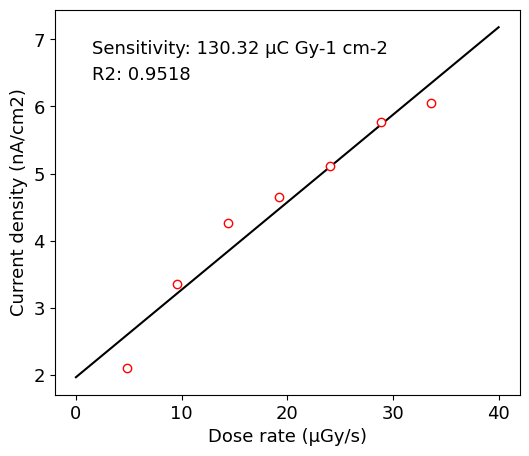

230528-0.2mmh_-004.8V-bkg.csv
Avg:2.5488,Std:0.1113
Avg:4.4122,Std:0.1694
Avg:5.7947,Std:0.2190
Avg:6.8541,Std:0.2586
Avg:7.5442,Std:0.2972
Avg:8.3400,Std:0.4382
Avg:8.9354,Std:0.2937


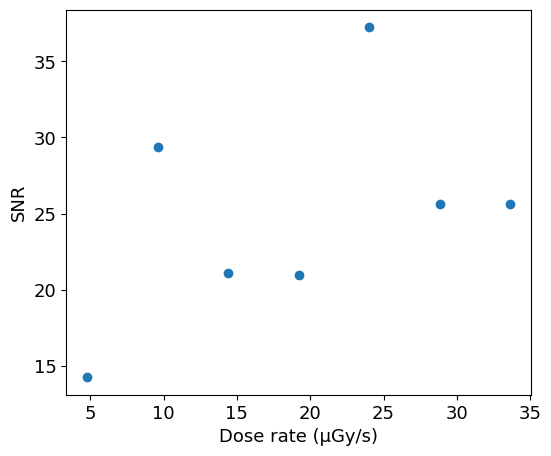

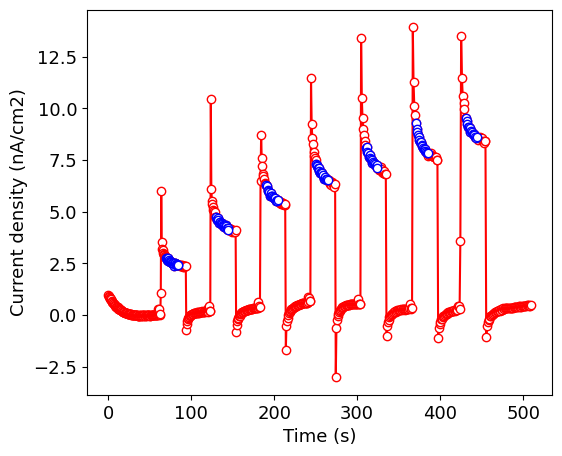

Sensitivity: 213.83 µC Gy-1 cm-2
R2: 0.9583


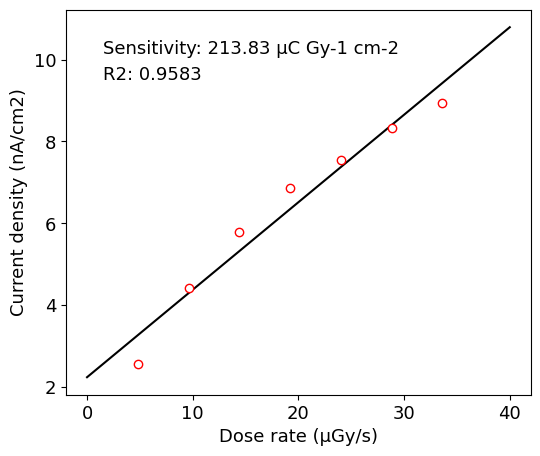

230528-0.2mmh_-012.0V-bkg.csv
Avg:4.0119,Std:0.1337
Avg:7.2273,Std:0.2253
Avg:9.2071,Std:0.4118
Avg:10.7063,Std:0.4483
Avg:12.1740,Std:0.3993
Avg:13.7629,Std:0.4459
Avg:15.5343,Std:0.4007


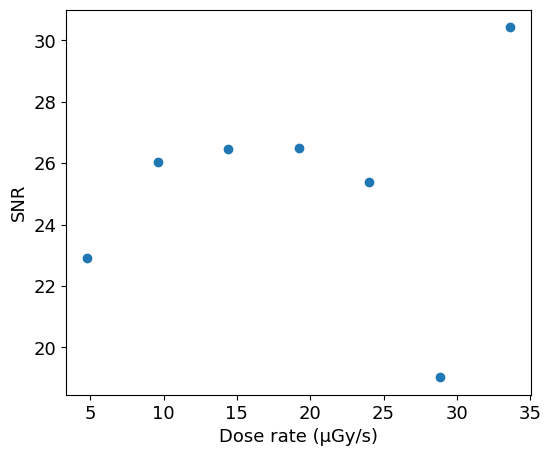

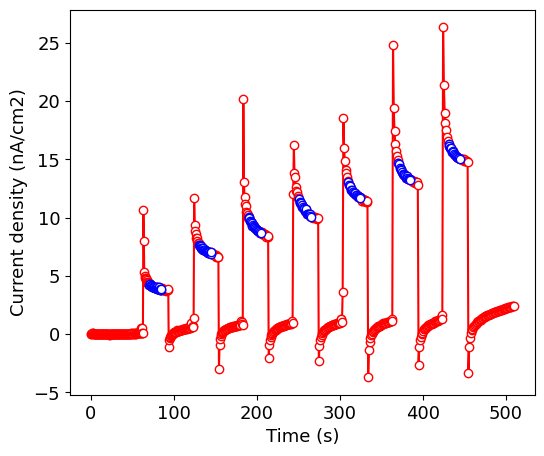

Sensitivity: 376.18 µC Gy-1 cm-2
R2: 0.9813


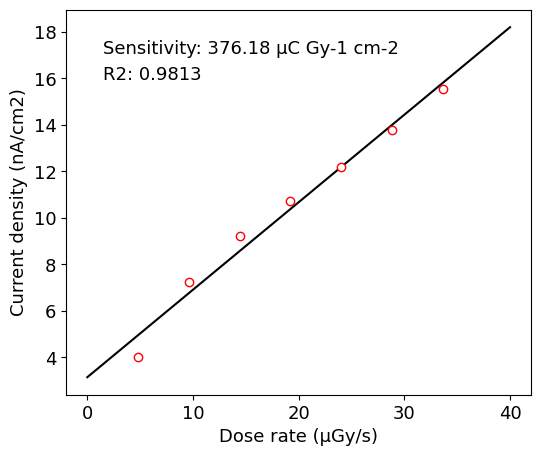

230528-0.2mmh_-024.0V-bkg.csv
Avg:4.8499,Std:0.2189
Avg:8.7880,Std:0.3532
Avg:12.1626,Std:0.3693
Avg:15.1201,Std:0.4969
Avg:17.4295,Std:0.5288
Avg:20.2015,Std:0.5143
Avg:23.2605,Std:0.5641


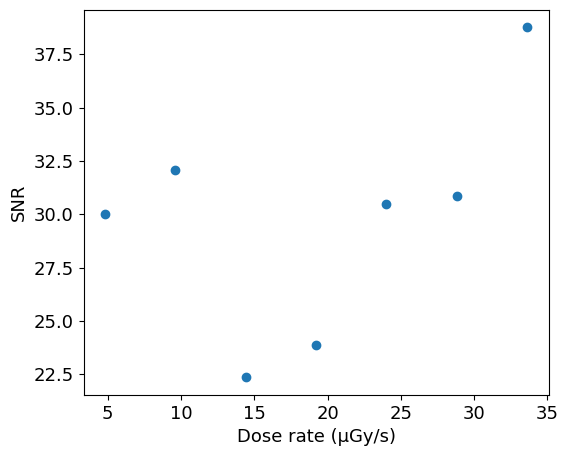

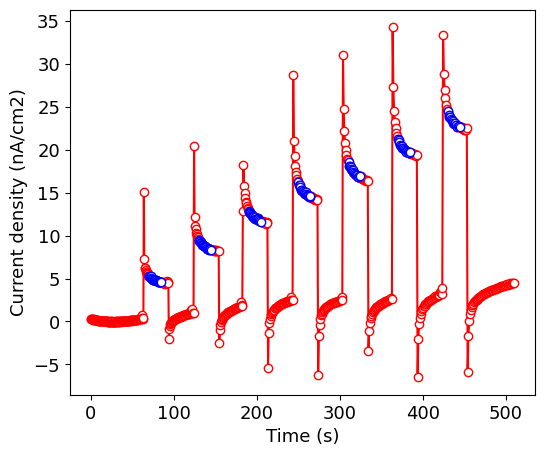

Sensitivity: 619.42 µC Gy-1 cm-2
R2: 0.9942


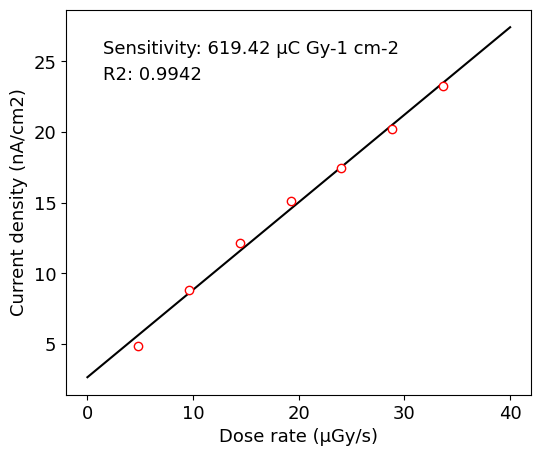

230528-0.2mmh_-048.0V-bkg.csv
Avg:6.3530,Std:0.2425
Avg:11.5875,Std:0.4823
Avg:15.6895,Std:0.5336
Avg:19.7660,Std:0.5505
Avg:23.9789,Std:0.6251
Avg:28.0528,Std:0.5509
Avg:32.2564,Std:0.6687


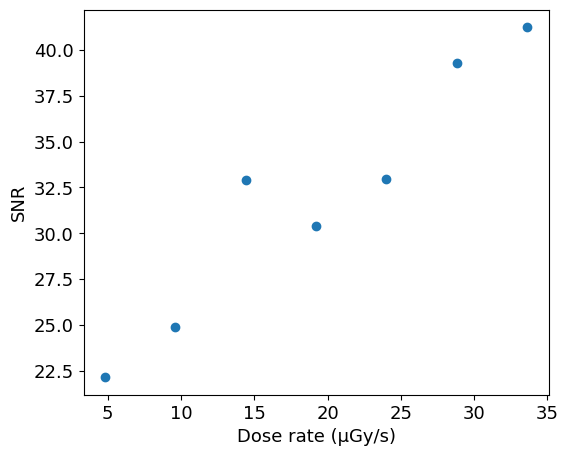

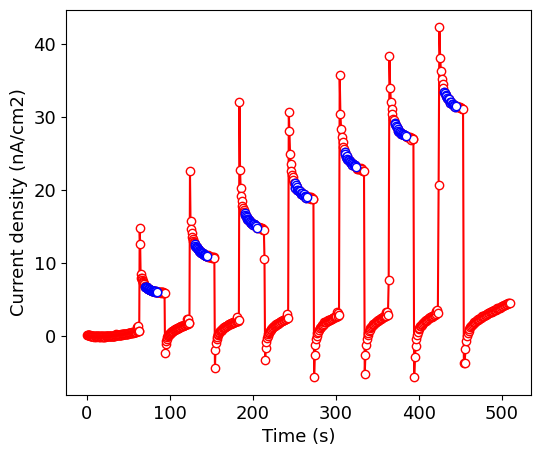

Sensitivity: 884.09 µC Gy-1 cm-2
R2: 0.9988


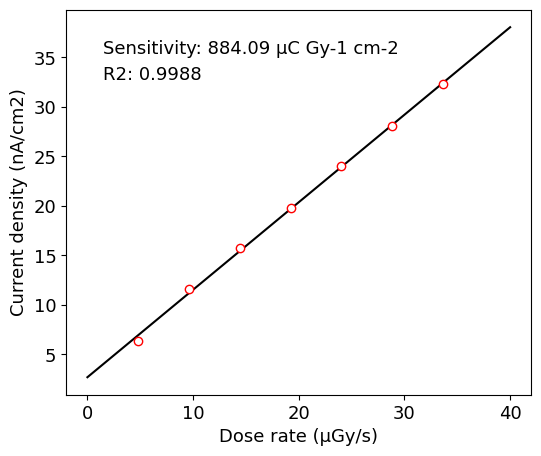

230528-0.2mmh_-120.0V-bkg.csv
Avg:8.7699,Std:0.4623
Avg:16.6971,Std:0.7136
Avg:23.3799,Std:0.7389
Avg:29.8667,Std:0.6693
Avg:36.1032,Std:0.7966
Avg:43.0658,Std:0.9130
Avg:49.5687,Std:0.8616


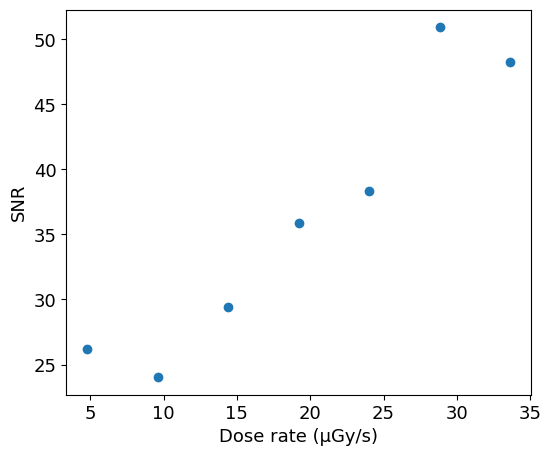

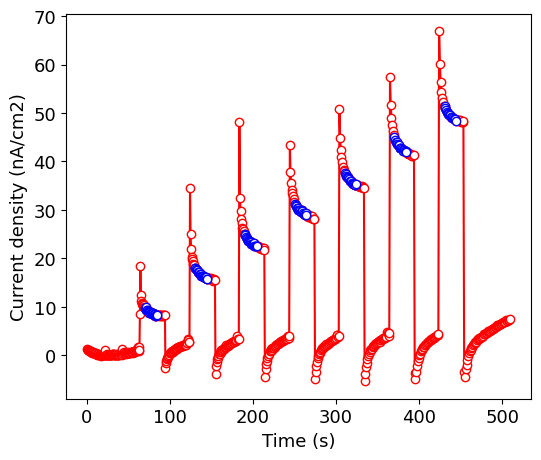

Sensitivity: 1396.47 µC Gy-1 cm-2
R2: 0.9991


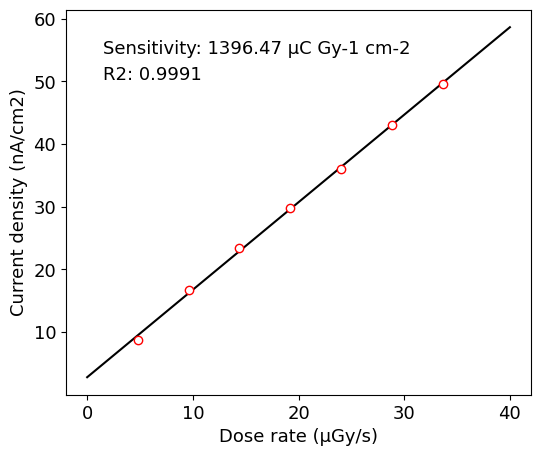

230530-0.5mmh_-003.1V-bkg.csv
Avg:3.0700,Std:0.1141
Avg:5.1205,Std:0.1152
Avg:6.6127,Std:0.1612
Avg:7.6131,Std:0.2784
Avg:8.3548,Std:0.3352
Avg:8.7442,Std:0.4310
Avg:9.2094,Std:0.5226


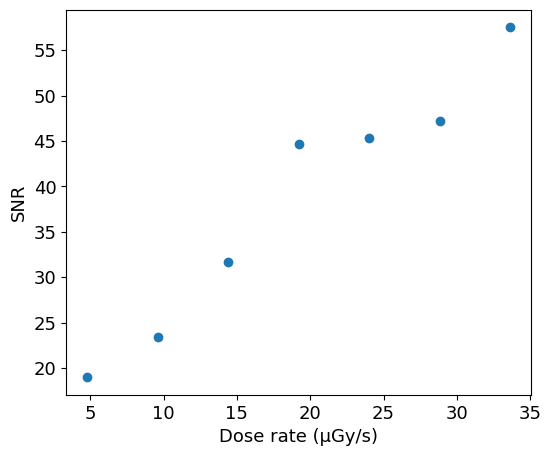

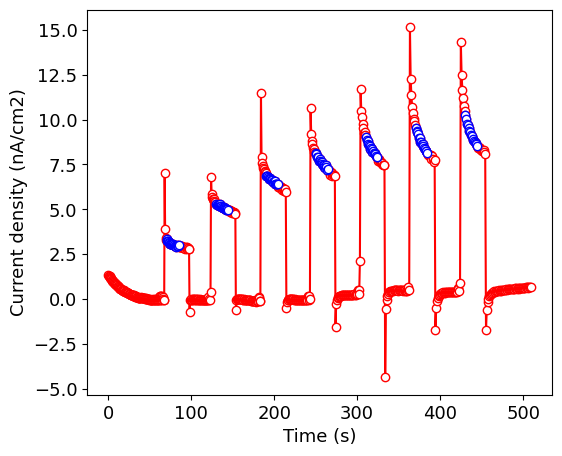

Sensitivity: 203.74 µC Gy-1 cm-2
R2: 0.9171


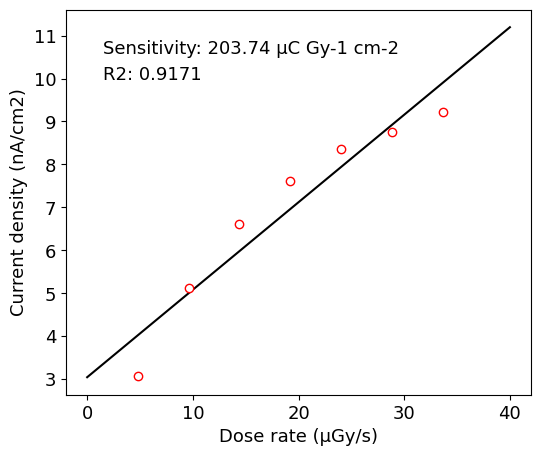

230530-0.5mmh_-006.2V-bkg.csv
Avg:3.9018,Std:0.1178
Avg:6.9029,Std:0.1658
Avg:9.0486,Std:0.2738
Avg:10.4555,Std:0.4017
Avg:11.2483,Std:0.5262
Avg:12.2120,Std:0.5708
Avg:13.5076,Std:0.6182


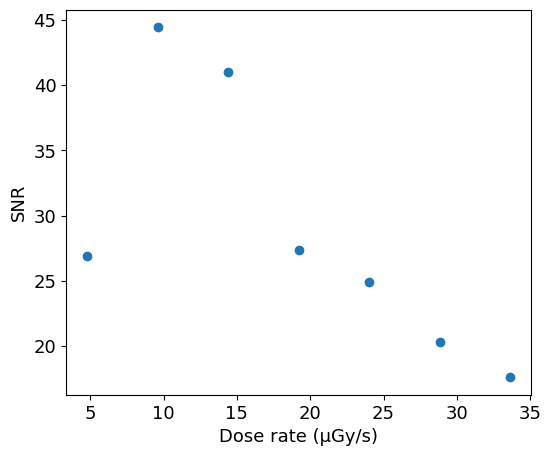

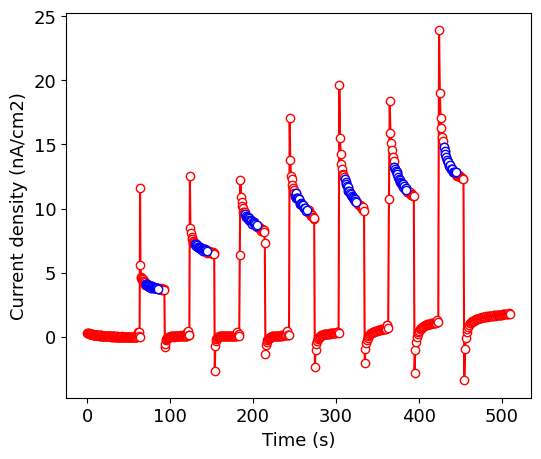

Sensitivity: 309.50 µC Gy-1 cm-2
R2: 0.9439


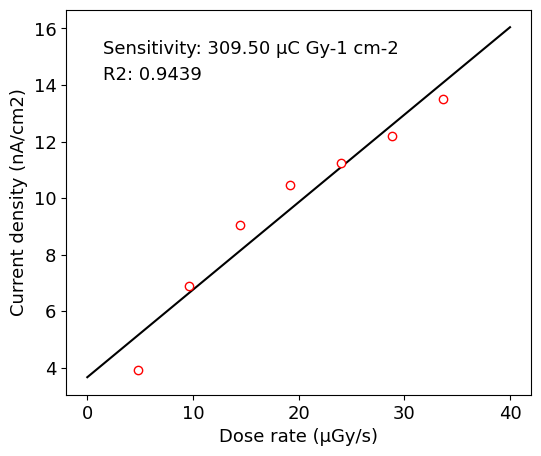

230530-0.5mmh_-015.5V-bkg.csv
Avg:5.5394,Std:0.1852
Avg:9.8974,Std:0.2908
Avg:13.4376,Std:0.4034
Avg:15.9531,Std:0.6347
Avg:17.6765,Std:0.7951
Avg:19.6736,Std:0.8002
Avg:23.2819,Std:0.9911


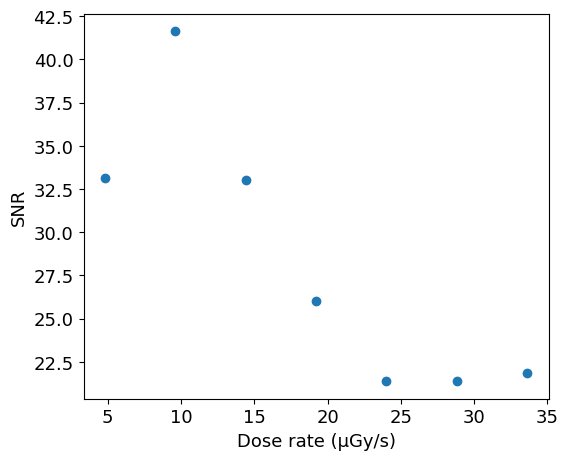

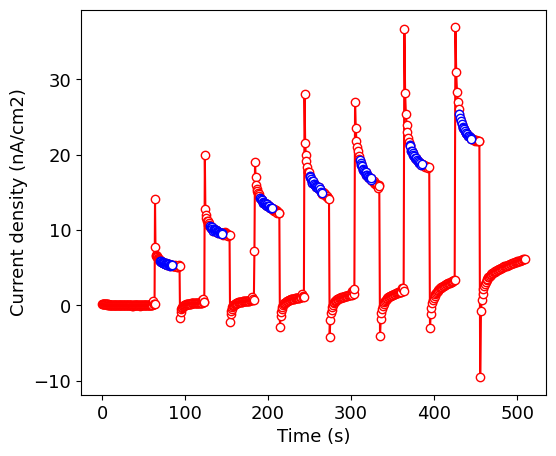

Sensitivity: 572.53 µC Gy-1 cm-2
R2: 0.9787


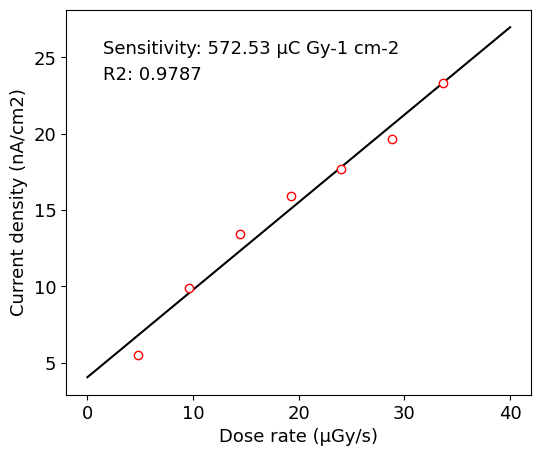

230530-0.5mmh_-031.0V-bkg.csv
Avg:7.8426,Std:0.2976
Avg:14.0356,Std:0.3978
Avg:18.8958,Std:0.6290
Avg:22.5004,Std:0.7630
Avg:25.1778,Std:1.1563
Avg:29.3035,Std:1.7748
Avg:31.7411,Std:1.0869


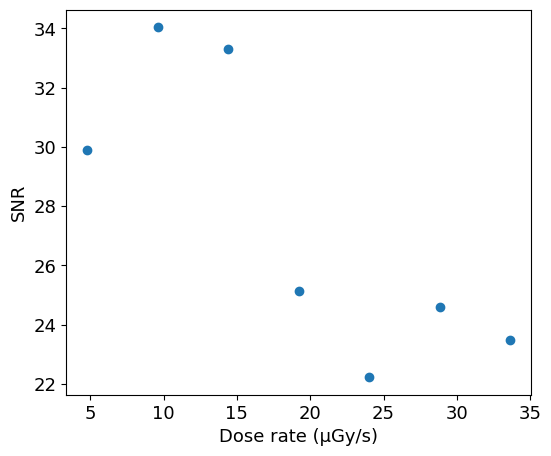

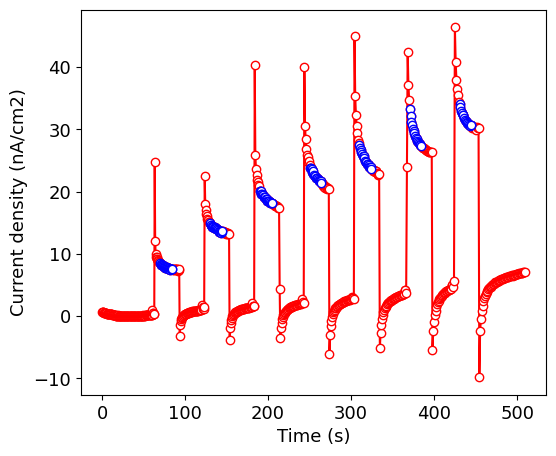

Sensitivity: 806.65 µC Gy-1 cm-2
R2: 0.9799


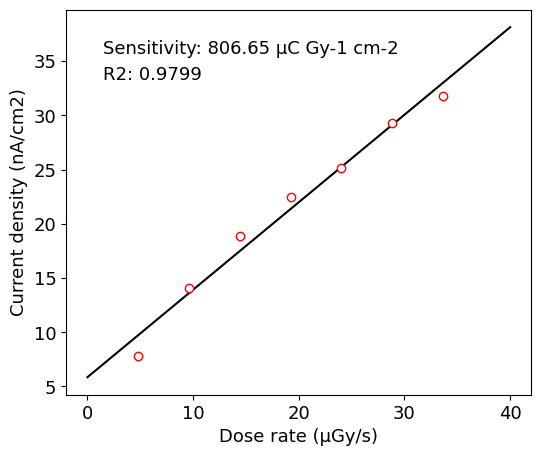

230530-0.5mmh_-062.0V-bkg.csv
Avg:9.9342,Std:0.3616
Avg:18.5930,Std:0.5613
Avg:24.4590,Std:0.8891
Avg:28.5283,Std:1.1730
Avg:31.8837,Std:1.1640
Avg:36.9445,Std:1.3025
Avg:44.7167,Std:2.4439


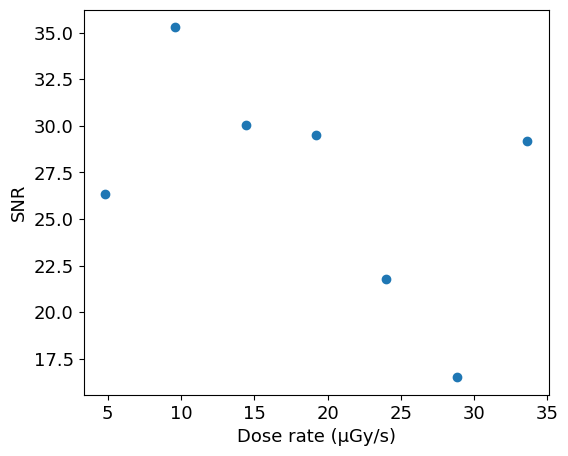

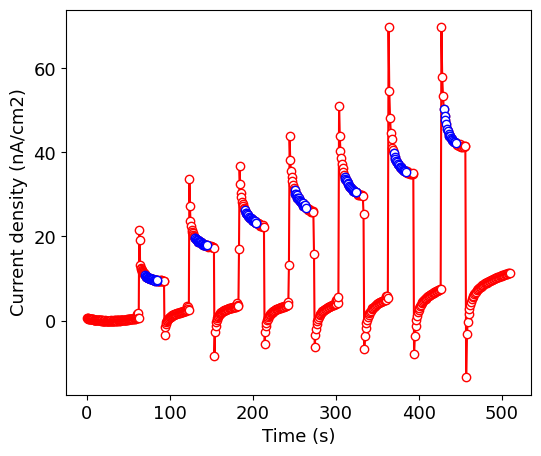

Sensitivity: 1103.71 µC Gy-1 cm-2
R2: 0.9816


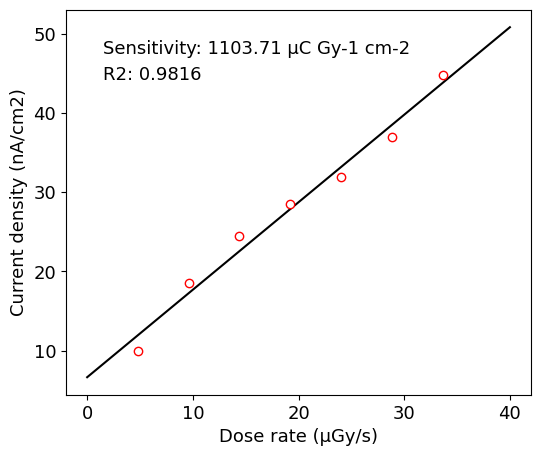

230530-0.5mmh_-155.0V-bkg.csv
Avg:14.3890,Std:0.6600
Avg:25.1272,Std:0.8128
Avg:35.2758,Std:1.0171
Avg:44.1616,Std:1.4878
Avg:50.5011,Std:1.8295
Avg:55.1791,Std:1.6753
Avg:61.1493,Std:1.8038


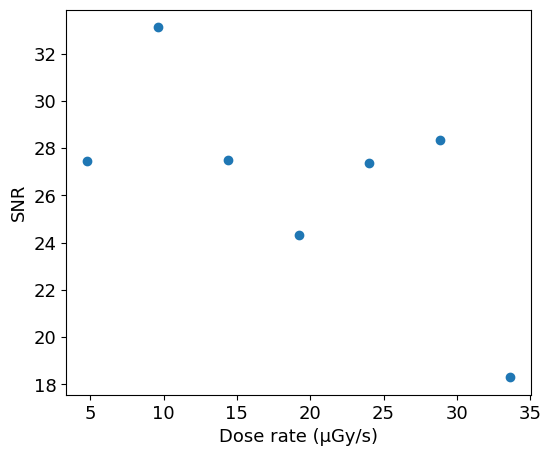

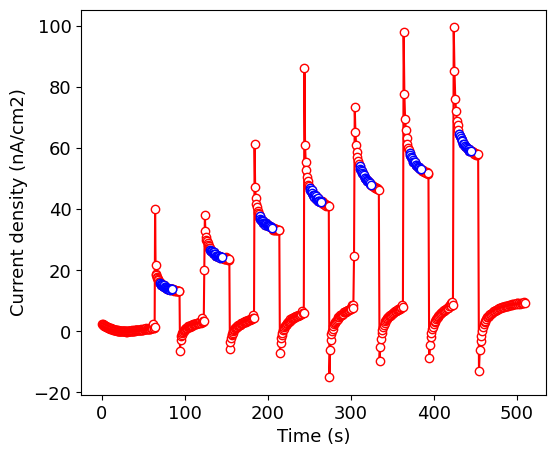

Sensitivity: 1602.77 µC Gy-1 cm-2
R2: 0.9767


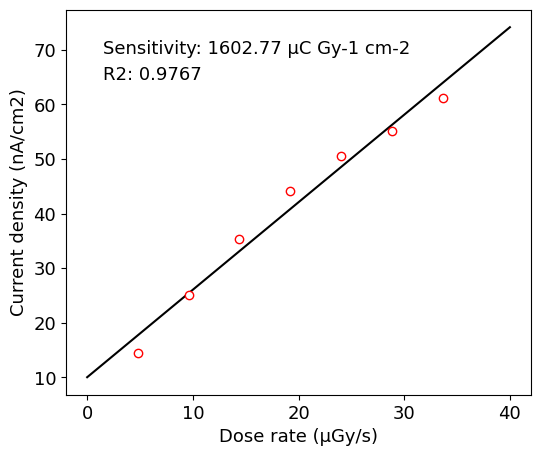

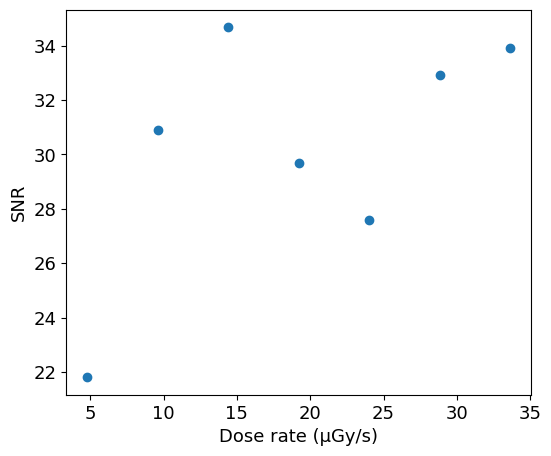

In [4]:
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn.metrics import r2_score

plot_ids = np.arange(1,len(csv_list)+1,1)
X_dose = [4.8044,9.6088,14.4132,19.2176,24.022,28.8264,33.6308] # µGy/s

sample_name_list = []
sensitivity_list = []
photo_J_list = []
photo_J_error_list = []
R2_list = []
SNR_list = []

for plot_id in plot_ids:
    df = df_list[plot_id-1]
    sample_name = files[plot_id-1][:-8]
    X = df['Time (s)'].to_list()
    Y = df['J-bkg'].to_list() # nA/cm2

    print(files[plot_id-1])

    plt.rcParams["font.size"] = 13
    fig = plt.figure(figsize=(6, 5))
    plt.plot(X,Y,c='red',marker='o',mfc='white')

    Y_response = []
    Y_noise = []
    Y_SNR = []
    

    time_offsets = np.linspace(70,430,7) # first ON time, last ON time, number of pulses
    duration = 15

    for time_offset in time_offsets:
        X_range = [time_offset,time_offset+duration]

        X_on, Y_on = [], []
        for x in X:
            if x > X_range[0] and x < X_range[1]:
                X_on.append(x)
                Y_on.append(Y[X.index(x)])

        plt.plot(X_on,Y_on,c='blue',linewidth=3,marker='o',mfc='white')

        mean_value = statistics.mean(Y_on)
        std_dev = statistics.stdev(Y_on)

        Y_response.append(mean_value)
        Y_noise.append(std_dev)
        Y_SNR.append(mean_value/std_dev)
        
        print(f'Avg:{mean_value:.4f},Std:{std_dev:.4f}')

    # Response
    plt.xlabel('Time (s)')
    plt.ylabel('Current density (nA/cm2)')
    if fig_save_option:
        fig1 = f'{figure_dir}/{sample_name}_tJ.png'
        plt.savefig(fig1, dpi=900, bbox_inches='tight', transparent=True)
    plt.show()

    # Sensitivity
    X_fit = [0,40]
    # X_fit = [0,10050]
    a, b = np.polyfit(X_dose,Y_response,1)
    Y_fit = [a*n + b for n in X_fit]
    r2 = r2_score(Y_response, [a*n + b for n in X_dose])
    print(f'Sensitivity: {a*1000:.2f} µC Gy-1 cm-2')
    print(f'R2: {r2:.4f}')

    plt.rcParams["font.size"] = 13
    fig = plt.figure(figsize=(6, 5))
    plt.plot(X_fit,Y_fit,c='black')
    plt.scatter(X_dose,Y_response,fc='white',ec='red',zorder=2)
    plt.xlabel('Dose rate (µGy/s)')
    plt.ylabel('Current density (nA/cm2)')
    plt.text(0.08, 0.9, f'Sensitivity: {a*1000:.2f} µC Gy-1 cm-2', ha='left', va='center', transform=plt.gca().transAxes)
    plt.text(0.08, 0.83, f'R2: {r2:.4f}', ha='left', va='center', transform=plt.gca().transAxes)
    if fig_save_option:
        fig2 = f'{figure_dir}/{sample_name}_sensitivity.png'
        plt.savefig(fig2, dpi=900, bbox_inches='tight', transparent=True)
    plt.show()

    # SNR
    plt.rcParams["font.size"] = 13
    fig = plt.figure(figsize=(6, 5))
    plt.scatter(X_dose,Y_SNR)
    plt.xlabel('Dose rate (µGy/s)')
    plt.ylabel('SNR')
    
    sample_name_list.append(sample_name)
    sensitivity_list.append(a*1000)
    photo_J_list.append(Y_response)
    photo_J_error_list.append(Y_noise)
    R2_list.append(r2)
    SNR_list.append(Y_SNR)

230528-0.2mmh_-002.4V, 130.3 µC/Gy/cm2, R2=0.952
230528-0.2mmh_-004.8V, 213.8 µC/Gy/cm2, R2=0.958
230528-0.2mmh_-012.0V, 376.2 µC/Gy/cm2, R2=0.981
230528-0.2mmh_-024.0V, 619.4 µC/Gy/cm2, R2=0.994
230528-0.2mmh_-048.0V, 884.1 µC/Gy/cm2, R2=0.999
230528-0.2mmh_-120.0V, 1396.5 µC/Gy/cm2, R2=0.999
230530-0.5mmh_-003.1V, 203.7 µC/Gy/cm2, R2=0.917
230530-0.5mmh_-006.2V, 309.5 µC/Gy/cm2, R2=0.944
230530-0.5mmh_-015.5V, 572.5 µC/Gy/cm2, R2=0.979
230530-0.5mmh_-031.0V, 806.7 µC/Gy/cm2, R2=0.980
230530-0.5mmh_-062.0V, 1103.7 µC/Gy/cm2, R2=0.982
230530-0.5mmh_-155.0V, 1602.8 µC/Gy/cm2, R2=0.977


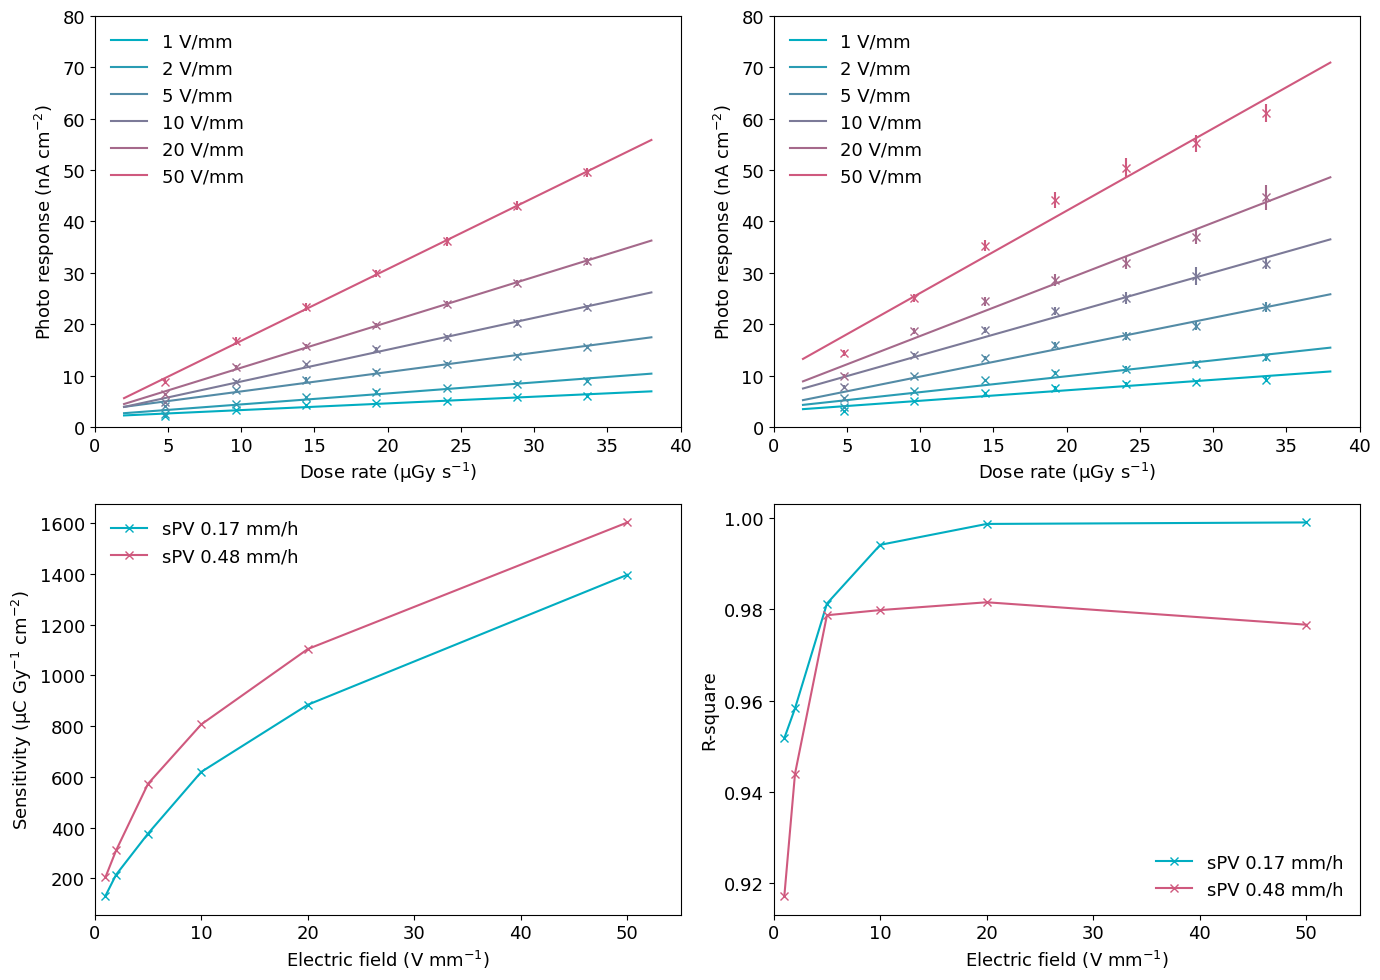

In [5]:

'''
SV 0.2
sPV 0.165
FWHM 17.67

SV 0.5
sPV 0.479
FWHM (fit fail)
'''

E_list = [1,2,5,10,20,50] # V/mm
colors = ['#CF597E', '#A5698B', '#7C7A98', '#538BA6', '#2A9CB3', '#01ADC1']
colors.reverse()

# plot
plt.rcParams["font.size"] = 13
fig, axes = plt.subplots(nrows=2, ncols=2, tight_layout=True, figsize=(14,10))

ax1 = axes[0][0]
for i in range(6):
    print(f'{sample_name_list[i]}, {sensitivity_list[i]:.1f} µC/Gy/cm2, R2={R2_list[i]:.3f}')
    ax1.errorbar(x=X_dose,y=photo_J_list[i],yerr=photo_J_error_list[i],c=colors[i],linestyle='',marker='x')
    a, b = np.polyfit(X_dose,photo_J_list[i],1)
    X_fit = np.linspace(2,38,2)
    ax1.plot(X_fit,[a*n+b for n in X_fit],c=colors[i], label=f'{E_list[i]} V/mm')
    
ax1.set_xlabel('Dose rate (µGy s$^{-1}$)')
ax1.set_ylabel('Photo response (nA cm$^{-2}$)')
ax1.legend(frameon=False)
ax1.set_xlim(0,40)
ax1.set_ylim(0,80)

ax2 = axes[0][1]
for i in range(6):
    print(f'{sample_name_list[i+6]}, {sensitivity_list[i+6]:.1f} µC/Gy/cm2, R2={R2_list[i+6]:.3f}')
    ax2.errorbar(x=X_dose,y=photo_J_list[i+6],yerr=photo_J_error_list[i+6],c=colors[i],linestyle='',marker='x')
    a, b = np.polyfit(X_dose,photo_J_list[i+6],1)
    X_fit = np.linspace(2,38,2)
    ax2.plot(X_fit,[a*n+b for n in X_fit],c=colors[i], label=f'{E_list[i]} V/mm')
    
ax2.set_xlabel('Dose rate (µGy s$^{-1}$)')
ax2.set_ylabel('Photo response (nA cm$^{-2}$)')
ax2.legend(frameon=False)
ax2.set_xlim(0,40)
ax2.set_ylim(0,80)


# E vs Sensitivity
ax3 = axes[1][0]
ax3.plot(E_list,sensitivity_list[:6],c=colors[0],label='sPV 0.17 mm/h',marker='x')
ax3.plot(E_list,sensitivity_list[-6:],c=colors[-1],label='sPV 0.48 mm/h',marker='x')
ax3.set_xlabel('Electric field (V mm$^{-1}$)')
ax3.set_ylabel('Sensitivity (µC Gy$^{-1}$ cm$^{-2}$)')
ax3.set_xlim(0,55)
ax3.legend(frameon=False)

# E vs R2
ax4 = axes[1][1]
ax4.plot(E_list,R2_list[:6],c=colors[0],label='sPV 0.17 mm/h',marker='x')
ax4.plot(E_list,R2_list[-6:],c=colors[-1],label='sPV 0.48 mm/h',marker='x')
ax4.set_xlabel('Electric field (V mm$^{-1}$)')
ax4.set_ylabel('R-square')
ax4.set_xlim(0,55)
ax4.legend(frameon=False)

if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight')
    
plt.show()